In [63]:
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import glob

In [95]:
band2R = '/Users/Airton/Desktop/b2sparseless/results/weather/test_latest/images/*real_B.png'
band2F = '/Users/Airton/Desktop/b2sparseless/results/weather/test_latest/images/*fake_B.png'
band6R = '/Users/Airton/Desktop/band6/results_test/weather/test_latest/images/*real_B.png'
band6F = '/Users/Airton/Desktop/band6/results_test/weather/test_latest/images/*fake_B.png'
visR = '/Users/Airton/Desktop/visibility/results_test/weather/test_latest/images/*real_B.png'
visF = '/Users/Airton/Desktop/visibility/results_test/weather/test_latest/images/*fake_B.png'
rhumidR = '/Users/Airton/Desktop/RHumid/results_test/weather/test_latest/images/*real_B.png'
rhumidF = '/Users/Airton/Desktop/RHumid/results_test/weather/test_latest/images/*fake_B.png'

In [96]:
MSE = [] 
SSIM =[]

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

In [97]:
run1R = []
for filename in sorted(glob.glob(rhumidR)):
    im=Image.open(filename).convert('L')
    run1R.append(im)

In [98]:
run1F = []
for filename in sorted(glob.glob(rhumidF)):
    im=Image.open(filename).convert('L')
    run1F.append(im)

In [99]:
print(len(run1F))
print(len(run1R))

50
50


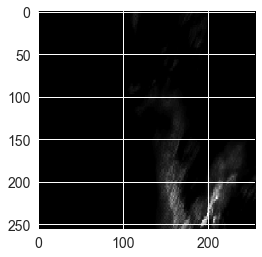

In [100]:
plt.imshow(np.array(run1R[0]),cmap='gray')
plt.show()

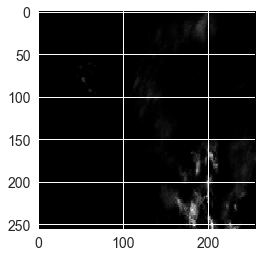

In [101]:
plt.imshow(np.array(run1F[0]),cmap='gray')
plt.show()

In [102]:
MSE = []
SSIM = []
for i in range(len(run1R)):
    m = mse(np.array(run1R[i]),np.array(run1F[i]))
    s = ssim(np.array(run1R[i]),np.array(run1F[i]))
    MSE.append(m)
    SSIM.append(s)

In [103]:
print(MSE)

[361.1083068847656, 212.4228515625, 82.64266967773438, 127.97262573242188, 144.23431396484375, 90.48130798339844, 58.54670715332031, 234.28118896484375, 342.6842803955078, 540.3383331298828, 407.34400939941406, 183.10903930664062, 344.3428955078125, 477.12745666503906, 88.35295104980469, 132.67877197265625, 280.1087188720703, 347.3115997314453, 210.40805053710938, 374.54148864746094, 260.09193420410156, 282.4747009277344, 365.4530944824219, 249.08819580078125, 149.6658172607422, 365.6236877441406, 470.78160095214844, 185.59963989257812, 333.47344970703125, 390.25384521484375, 235.72694396972656, 139.57151794433594, 54.202972412109375, 203.30992126464844, 207.06393432617188, 69.7933349609375, 52.07234191894531, 200.74842834472656, 378.24505615234375, 177.03416442871094, 164.71910095214844, 176.58712768554688, 195.85060119628906, 285.5609130859375, 189.56158447265625, 102.18864440917969, 179.9373016357422, 128.42697143554688, 50.85673522949219, 125.28492736816406]


In [104]:
print(SSIM)

[0.7527270468047553, 0.8395790658156254, 0.8659405123341369, 0.8830914091518971, 0.8898093004824326, 0.8963262733438524, 0.8420238486375631, 0.7633724535968367, 0.7176328617673814, 0.7734098285133103, 0.8116530295025568, 0.8983525276215487, 0.7900240326464222, 0.7443705582671899, 0.915254642044137, 0.8149497599549252, 0.8315007206975591, 0.8275406646713505, 0.8094040496265309, 0.8379902454524163, 0.8560447599561869, 0.8881217985645443, 0.8956071251414854, 0.854690294259988, 0.8079694007455974, 0.8088030243545629, 0.8063225911473393, 0.8231578746559121, 0.8984668120505516, 0.777969435520791, 0.8670959370035348, 0.7885348574313376, 0.9105991127075614, 0.8151522451348792, 0.857712183493098, 0.8725118600197003, 0.8200265886553341, 0.8273175117114341, 0.7527524770989893, 0.865747513242095, 0.855117528128372, 0.824951112196705, 0.8424084651986155, 0.7741426327268357, 0.7789278344700192, 0.837310496837979, 0.8262101958868004, 0.8116971296582213, 0.8425922489799459, 0.8281404353784316]


In [105]:
x=list(range(0,50))

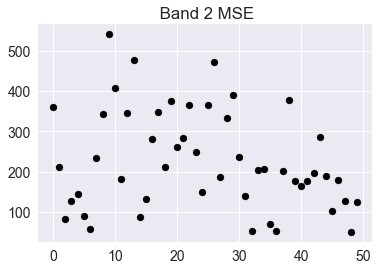

50.85673522949219 540.3383331298828
228.1857211303711


In [106]:
plt.scatter(x,MSE,c='black')
plt.title(" Band 2 MSE")
plt.show()
print(min(MSE),max(MSE))
print(np.mean(MSE))

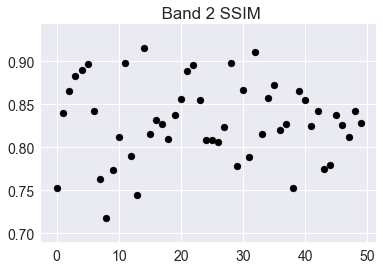

0.7176328617673814 0.915254642044137
0.8304210862657855


In [107]:
plt.scatter(x,SSIM,c='black')
plt.title(" Band 2 SSIM")
plt.show()
print(min(SSIM),max(SSIM))
print(np.mean(SSIM))

In [108]:
from sklearn.metrics import confusion_matrix

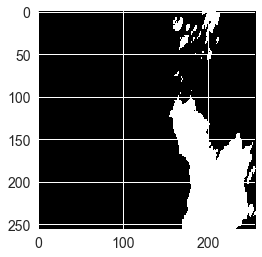

In [109]:
Thr = cv2.threshold(np.array(run1R[1]),1,255,cv2.THRESH_BINARY)
plt.imshow(Thr[1],cmap = 'gray')
plt.show()

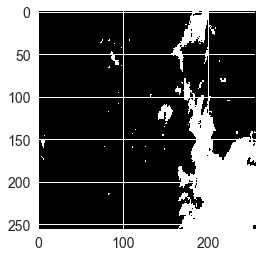

In [110]:
Thf = cv2.threshold(np.array(run1F[1]),1,255,cv2.THRESH_BINARY)
plt.imshow(Thf[1],cmap = 'gray')
plt.show()

In [111]:
Fthr = []
Fthf = []
for i in range(len(run1R)):
    gray_img= np.array(run1R[i])
    gray_img2= np.array(run1F[i])
    th1 = cv2.threshold(gray_img,1,255,cv2.THRESH_BINARY)
    th2 = cv2.threshold(gray_img2,1,255,cv2.THRESH_BINARY)
    Fr = list(th1[1].flatten())
    Ff = list(th2[1].flatten())
    Fthr.append(Fr)
    Fthf.append(Ff)

In [119]:
TN,FP,FN,TP = 0,0,0,0
TN1,FP1,FN1,TP1 = 0,0,0,0

In [120]:
for i in range(len(Fthr)):
    tn,fp,fn,tp=confusion_matrix(Fthr[i], Fthf[i]).ravel()
    TN = TN +tn
    FP = FP +fp
    FN = FN +fn
    TP = TP +tp

In [121]:
Total = TN+FP+FN+TP
TotalP = FN + TP
TotalN = TN + FP
PTN = (TN/Total)*100
PFP = (FP/Total)*100
PFN = (FN/Total)*100
PTP = (TP/Total)*100
To1 = FN + TN
To2 = TP + FP

In [122]:
PTC = []

In [123]:
PTC.append([PTN,PFP,PFN,PTP])

In [124]:
print(len(PTC))
print(PTC)

1
[[82.97048950195312, 7.269683837890625, 4.719970703125, 5.03985595703125]]


In [125]:
Correct = PTN + PTP
Wrong = PFN + PFP
print("Correct = ", Correct, " Wrong = ", Wrong)

Correct =  88.01034545898438  Wrong =  11.989654541015625


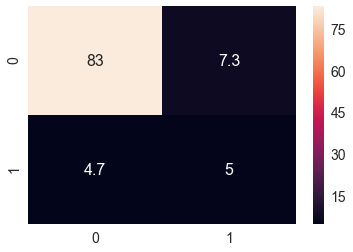

In [126]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[PTN,PFP],
        [PFN,PTP]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

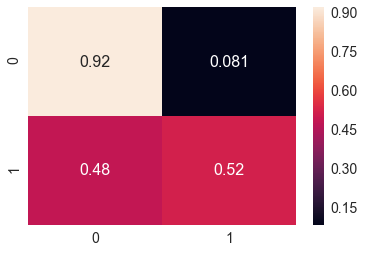

In [127]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[TN/TotalN,FP/TotalN],
        [FN/TotalP,TP/TotalP]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

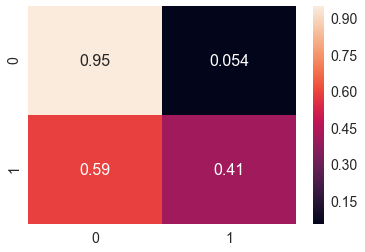

In [128]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[TN/To1,FN/To1],
        [FP/To2,TP/To2]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size